In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../dados/timbre_descritores.csv')  

In [4]:
cores = {'madeira': "#B47B52", 'plastico': '#4682B4'}

# Centroide

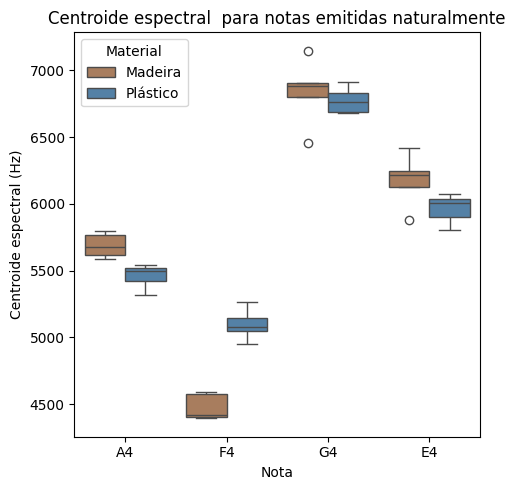

In [5]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df[df['metodo'] == 'natural'], 
            x='nota', y='centroide', hue='material', palette=cores)

plt.xlabel('Nota')
plt.ylabel('Centroide espectral (Hz)')
plt.title('Centroide espectral  para notas emitidas naturalmente')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Madeira' if l == 'madeira' else 'Plástico' for l in labels]
plt.legend(handles=handles, labels=labels, title='Material', frameon=True)

plt.tight_layout()
plt.show()

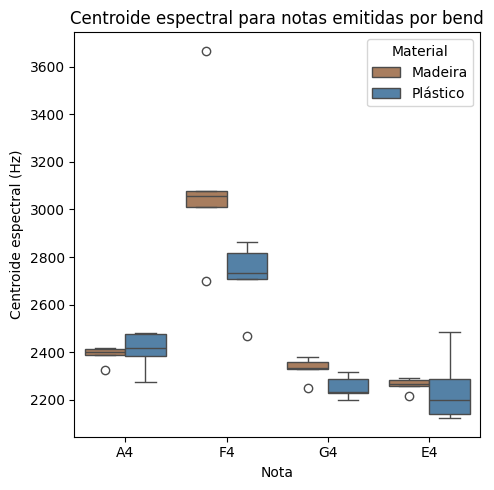

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df[df['metodo'] == 'bending'], 
            x='nota', y='centroide', hue='material', palette=cores)

plt.xlabel('Nota')
plt.ylabel('Centroide espectral (Hz)')
plt.title('Centroide espectral para notas emitidas por bend')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Madeira' if l == 'madeira' else 'Plástico' for l in labels]
plt.legend(handles=handles, labels=labels, title='Material', frameon=True)

plt.tight_layout()
plt.show()

# Tempo de ataque

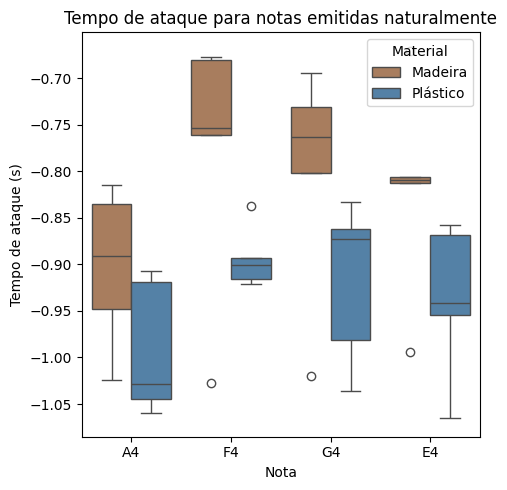

In [7]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df[df['metodo'] == 'natural'], 
            x='nota', y='atk_time', hue='material', palette=cores)

plt.xlabel('Nota')
plt.ylabel('Tempo de ataque (s)')
plt.title('Tempo de ataque para notas emitidas naturalmente')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Madeira' if l == 'madeira' else 'Plástico' for l in labels]
plt.legend(handles=handles, labels=labels, title='Material', frameon=True)

plt.tight_layout()
plt.show()

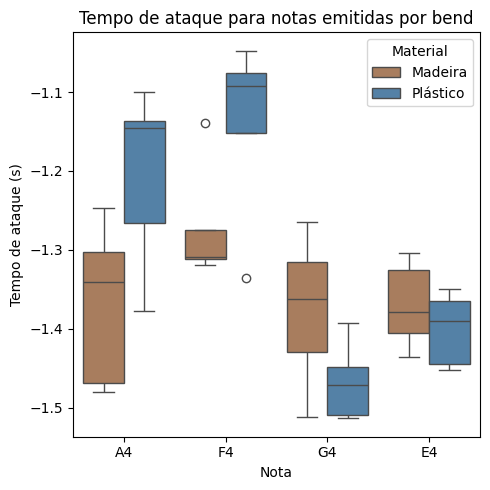

In [8]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df[df['metodo'] == 'bending'], 
            x='nota', y='atk_time', hue='material', palette=cores)

plt.xlabel('Nota')
plt.ylabel('Tempo de ataque (s)')
plt.title('Tempo de ataque para notas emitidas por bend')

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Madeira' if l == 'madeira' else 'Plástico' for l in labels]
plt.legend(handles=handles, labels=labels, title='Material', frameon=True)

plt.tight_layout()
plt.show()

In [10]:
print('\nMetodo (mediana global):')
medianas = df.groupby('metodo')[['centroide', 'atk_time']].median()
print(medianas.round(4))

print('\nMetodo (mediana por nota):')
medianas = df.groupby(['nota', 'metodo'])[['centroide', 'atk_time']].median()
print(medianas.round(4))


Metodo (mediana global):
         centroide  atk_time
metodo                      
bending  2370.0798   -1.3381
natural  5803.0168   -0.8822

Metodo (mediana por nota):
              centroide  atk_time
nota metodo                      
A4   bending  2407.1067   -1.2843
     natural  5562.8021   -0.9334
E4   bending  2262.2279   -1.3844
     natural  6052.3847   -0.8626
F4   bending  2839.5951   -1.2137
     natural  4772.0962   -0.8651
G4   bending  2303.0907   -1.4392
     natural  6815.8828   -0.8471


In [11]:
print('\nMetodo (IQR global):')
q3 = df.groupby('metodo')[['centroide', 'atk_time']].quantile(0.75)
q1 = df.groupby('metodo')[['centroide', 'atk_time']].quantile(0.25)
iqr = q3 - q1
print(iqr.round(4))

print('\nMetodo (IQR por nota):')
q3 = df.groupby(['nota', 'metodo'])[['centroide', 'atk_time']].quantile(0.75)
q1 = df.groupby(['nota', 'metodo'])[['centroide', 'atk_time']].quantile(0.25)
iqr = q3 - q1
print(iqr.round(4))


Metodo (IQR global):
         centroide  atk_time
metodo                      
bending   208.9232    0.1657
natural  1123.9284    0.1523

Metodo (IQR por nota):
              centroide  atk_time
nota metodo                      
A4   bending    32.5736    0.1972
     natural   162.0852    0.1322
E4   bending    83.3116    0.0743
     natural   265.2046    0.1406
F4   bending   330.2055    0.2074
     natural   616.3796    0.1563
G4   bending    95.6415    0.1291
     natural   194.6137    0.1812


In [12]:
print('\nMaterial (mediana global):')
medianas = df.groupby('material')[['centroide', 'atk_time']].median()
print(medianas.round(4))

print('\nMaterial (mediana por nota):')
medianas = df.groupby(['nota', 'material'])[['centroide', 'atk_time']].median()
print(medianas.round(4))


Material (mediana global):
          centroide  atk_time
material                     
madeira   4030.4881   -1.0833
plastico  3906.6930   -1.0627

Material (mediana por nota):
               centroide  atk_time
nota material                     
A4   madeira   4001.7666   -1.1357
     plastico  3897.8964   -1.0800
E4   madeira   4087.1574   -1.1494
     plastico  4146.9788   -1.2075
F4   madeira   4030.4881   -1.0833
     plastico  3906.6930   -0.9841
G4   madeira   4418.7433   -1.1424
     plastico  4500.1410   -1.2142


In [13]:
print('\nMaterial (IQR global):')
q3 = df.groupby('material')[['centroide', 'atk_time']].quantile(0.75)
q1 = df.groupby('material')[['centroide', 'atk_time']].quantile(0.25)
iqr = q3 - q1
print(iqr.round(4))

print('\nMaterial (IQR por nota):')
q3 = df.groupby(['nota', 'material'])[['centroide', 'atk_time']].quantile(0.75)
q1 = df.groupby(['nota', 'material'])[['centroide', 'atk_time']].quantile(0.25)
iqr = q3 - q1
print(iqr.round(4))


Material (IQR global):
          centroide  atk_time
material                     
madeira   3443.2931    0.5122
plastico  3240.0782    0.4351

Material (IQR por nota):
               centroide  atk_time
nota material                     
A4   madeira   3261.8366    0.4263
     plastico  3047.4039    0.1113
E4   madeira   3921.6546    0.5550
     plastico  3763.1520    0.4391
F4   madeira   1352.9432    0.5457
     plastico  2320.1881    0.1841
G4   madeira   4523.5697    0.5778
     plastico  4493.4889    0.5651
